In [23]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


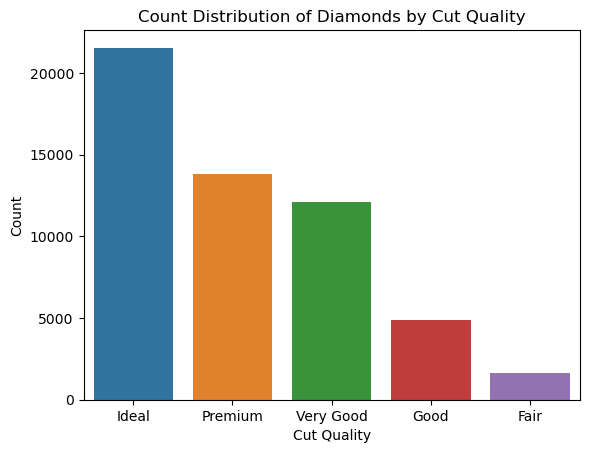

In [3]:
#1. Create a plot that shows the distribution of diamonds by their cut 
#quality.

# Create a countplot
sns.countplot(data=diamonds, x='cut')

# Set plot title and labels
plt.title('Count Distribution of Diamonds by Cut Quality')
plt.xlabel('Cut Quality')
plt.ylabel('Count')

plt.show()

#(a) What is the most common diamond cut quality? Why might this be the 
#case?

#The most common diamond cut quality is Ideal. This can be because of
#factors like price, demand, how easy/hard it is to create that cut
#quality.

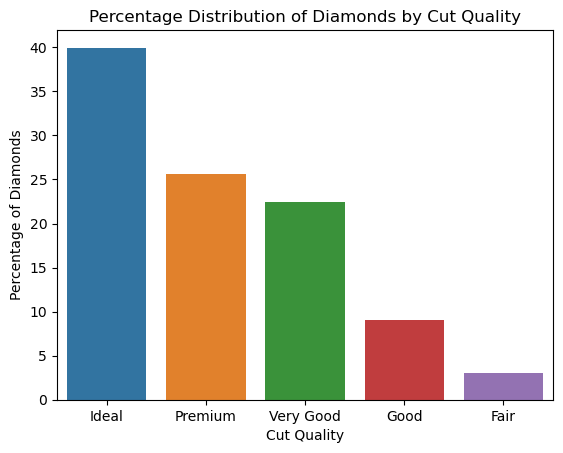

In [4]:
#(b) Remake your plot so that the y-axis shows the percent of all diamonds 
#instead of the count of the diamonds. Why might this be preferable?

# Calculate the percentage of diamonds for each cut quality
totalCount = len(diamonds)
cutPercentages = diamonds['cut'].value_counts() / totalCount * 100

# Create a countplot with percentages
sns.barplot(x=cutPercentages.index, y=cutPercentages.values)

# Set plot title and labels
plt.title('Percentage Distribution of Diamonds by Cut Quality')
plt.xlabel('Cut Quality')
plt.ylabel('Percentage of Diamonds')

plt.show()


#This graph is more preferred because it allows a clear picture to show a 
#distributuion of the cut quality in relation to the other diamond cut
#quality. This is better than the count of that cut quality and allows us 
#to compare better to other datasets.

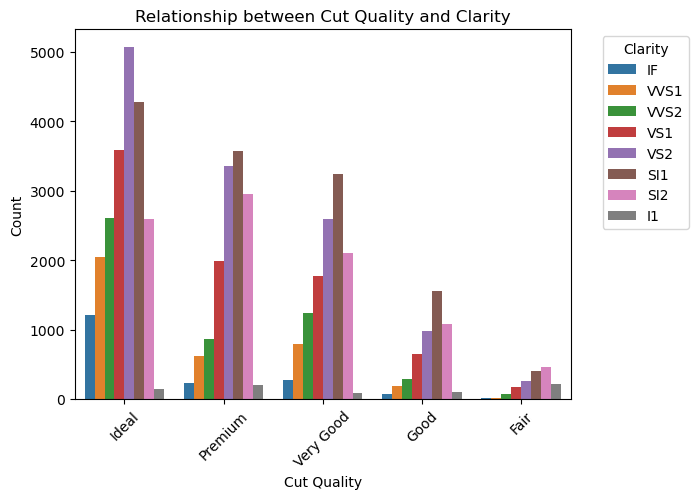

In [5]:
#2. Create a bar chart to explore the relationship between cut quality and
#clarity. Do you notice any trends?

# Create a countplot with cut quality and clarity
sns.countplot(data=diamonds, x='cut', hue='clarity')

# Set plot title and labels
plt.title('Relationship between Cut Quality and Clarity')
plt.xlabel('Cut Quality')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend(title='Clarity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#The top clarity for three out of the cut qualities is SI1
#The top 3 cut qualities for almost all cuts except Ideal are VS2, SI1, and,
#SI2. Ideal has VS2 and SI1 but instead of SI2, it has VS1

D:\Users\emman\Anaconda03\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\Users\emman\Anaconda03\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


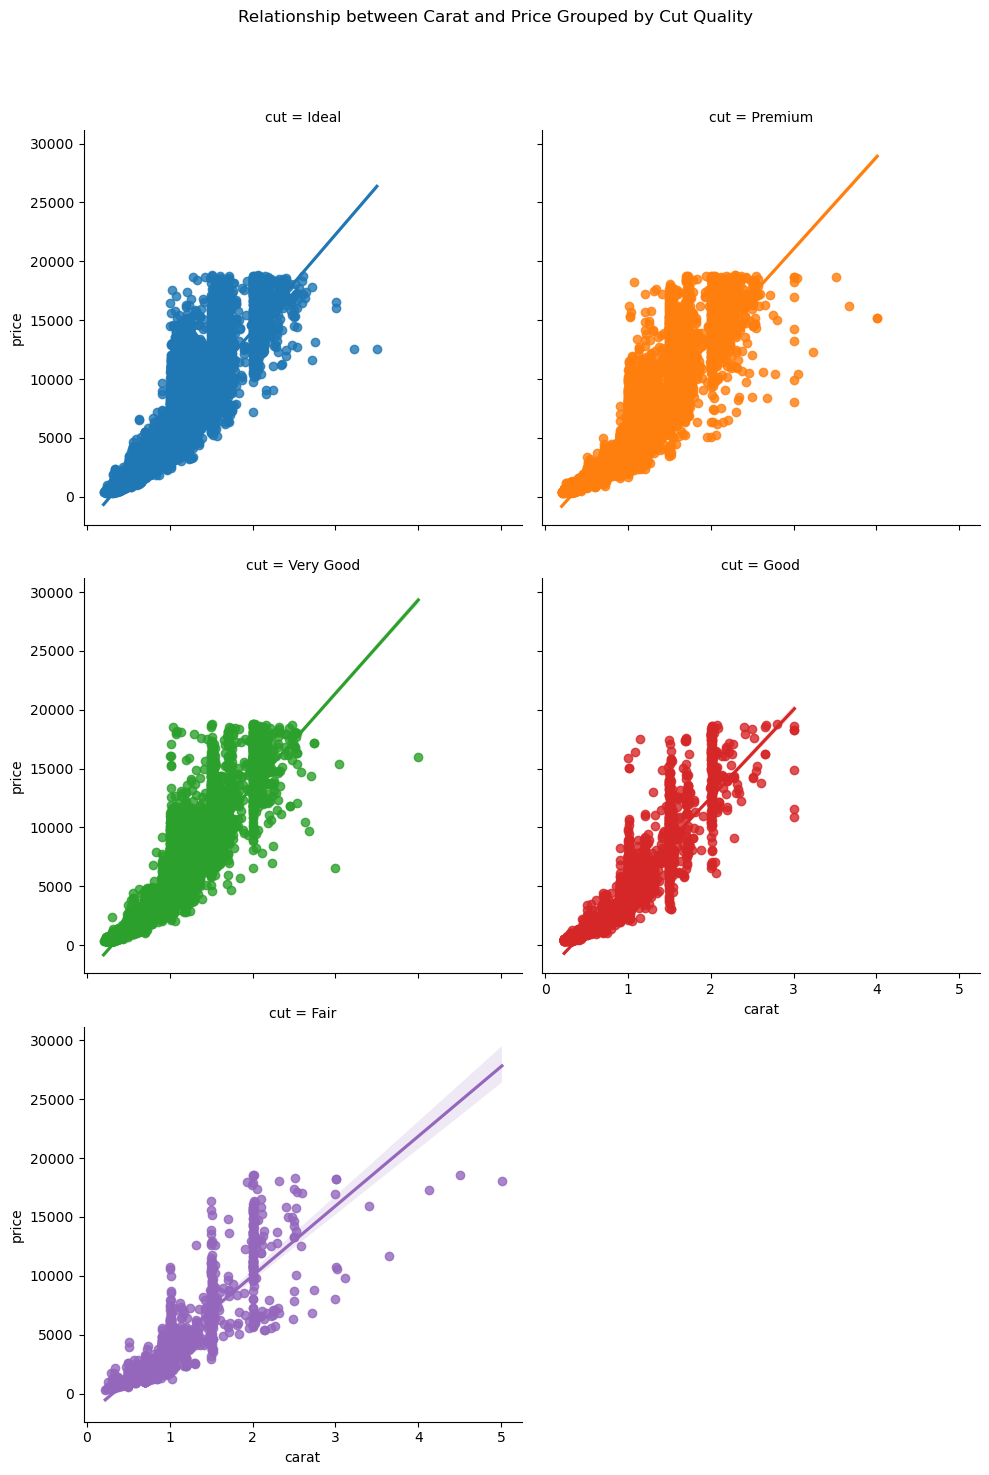

In [6]:
#3. Create a set of charts that show the relationship between carat and 
#price grouped by cut quality. (Each cut quality should have its own graph.)

# Create scatter plots for each cut quality
sns.lmplot(data=diamonds, x='carat', y='price', hue='cut', col='cut', col_wrap=2, height=5)

# Set plot titles
plt.subplots_adjust(top=0.9)
plt.suptitle('Relationship between Carat and Price Grouped by Cut Quality')

plt.show()

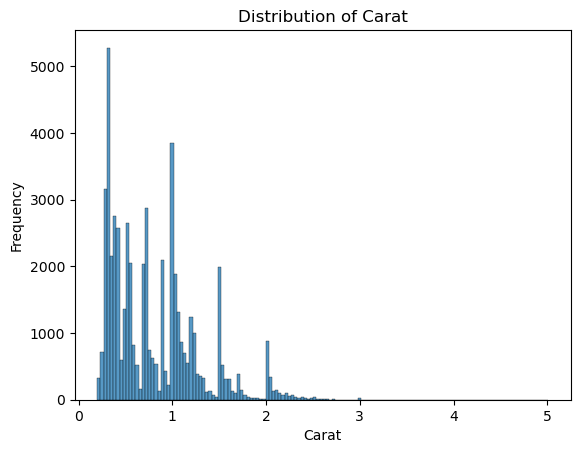

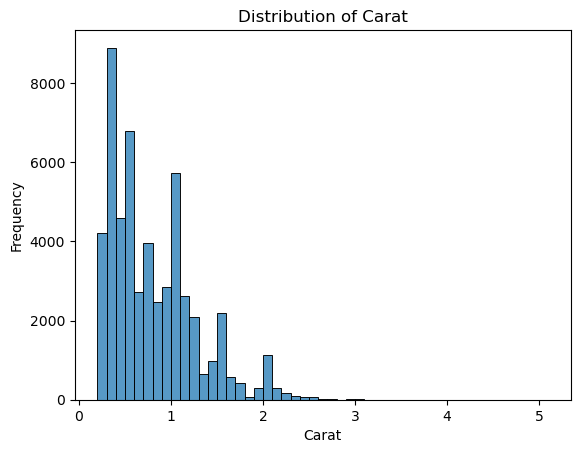

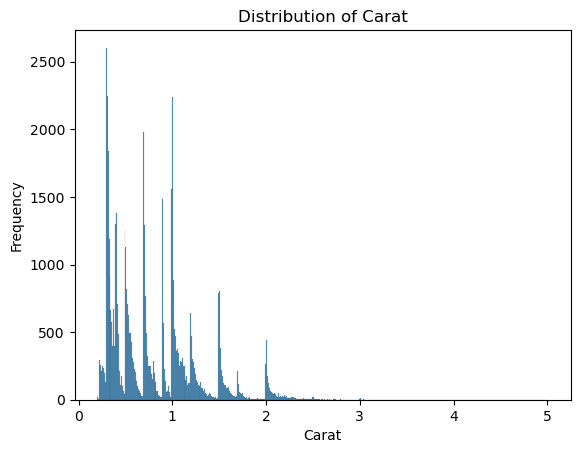

In [16]:
#4. Create a histogram that shows the distribution of carat.

# Create a histogram of carat distribution
sns.histplot(data=diamonds, x='carat')  # Default bin width

# Set plot title and labels
plt.title('Distribution of Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#(a) Change the bin width to 0.1.

# Create a histogram of carat distribution with bin width = 0.1
sns.histplot(data=diamonds, x='carat', binwidth=0.1)

# Set plot title and labels
plt.title('Distribution of Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')

plt.show()

#(b) Do you notice patterns? Why might those occur?
#The higher the bin width, the less peaks within the data. This happens as
#when there's less peaks, data is being combined together (i.e diamonds
#that have a 0.6 carat vs a 0.61 carat). There will be more diamonds for a
#0.6 carat diamind than a 0.61 which allows for a larger count but the peaks
#in the graph would be less since the data intervals are more broad

In [ ]:
#(c) Refine the bin width to 0.01. Does it confirm your pattern?

# Create a histogram of carat distribution with bin width = 0.01
sns.histplot(data=diamonds, x='carat', binwidth=0.01)

# Set plot title and labels
plt.title('Distribution of Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')

plt.show()

#The graph does prove my pattern as the bin width decreased and more peaks
#were created since the data is more specific.

In [2]:
#5. Make a scatterplot comparing carat and price. Do you notice any 
#potential outliers? If so, investigate them.

# Create a scatterplot of carat vs. price
sns.scatterplot(data=diamonds, x='carat', y='price')

# Set plot title and labels
plt.title('Scatterplot of Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.show()

#From the graph, I would believe there are outliers as a lot of the data
#between 0 and 2.5 carats so there is a possibility of outliers so I will
#calculate outliers through Quartiles, IQR and the upper/lower bounds.

# Calculate the interquartile range (IQR) for price
Q1 = diamonds['price'].quantile(0.25)
Q3 = diamonds['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lBound = Q1 - 1.5 * IQR
uBound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = diamonds[(diamonds['price'] < lBound) | (diamonds['price'] > uBound)]

print("Potential outliers:")
outliers

NameError: name 'sns' is not defined

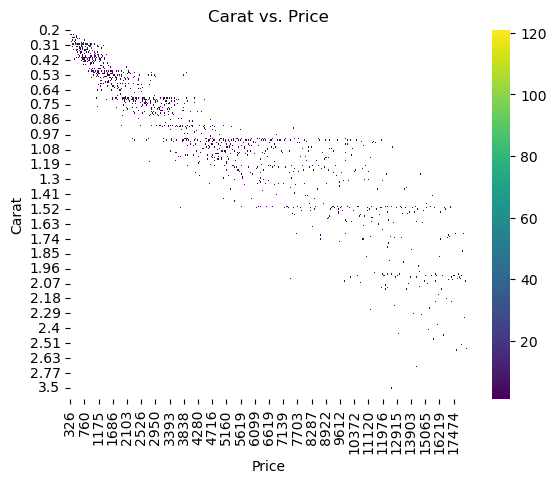

In [29]:
#6. Make a heatmap comparing carat to price, use the viridis color scheme.

# Create a heatmap comparing carat to price with the Viridis color scheme
sns.heatmap(diamonds.groupby(['carat', 'price']).size().unstack(), cmap='viridis')

# Set plot title and labels
plt.title('Carat vs. Price')
plt.xlabel('Price')
plt.ylabel('Carat')

plt.show()

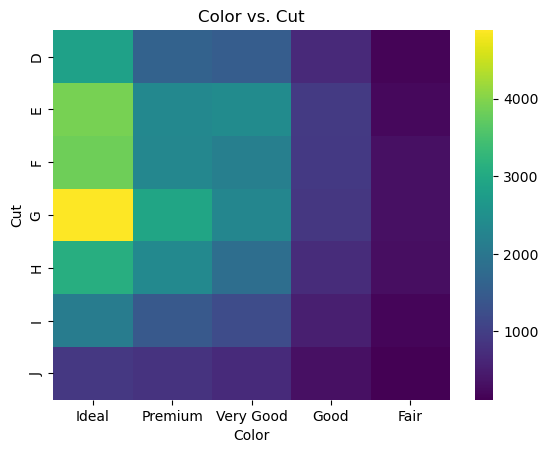

In [30]:
#7. Make a heatmap comparing color to cut, use viridis color scheme.

# Create a heatmap comparing carat to price with the Viridis color scheme
sns.heatmap(diamonds.groupby(['color', 'cut']).size().unstack(), cmap='viridis')

# Set plot title and labels
plt.title('Color vs. Cut')
plt.xlabel('Color')
plt.ylabel('Cut')

plt.show()

In [31]:
#8. Explain why each of the previous two questions should or should not use
#a heat map.

#Carat vs Price:
#This heatmap is not appropriate because it doesn't really show us
#meaningful or datat that can be easily interpreted to find trends,
#patternsm and/or clusters within the data.

#Color vs Cut: 
#This heatmap is appropriote because it shows us the visualization between 
#two variables. Heatmaps are very good at displaying the intensity or 
#density of data between 2 variables. The heatmap identifies high and low
#concentration areas for diamonds based on their cut and weight.

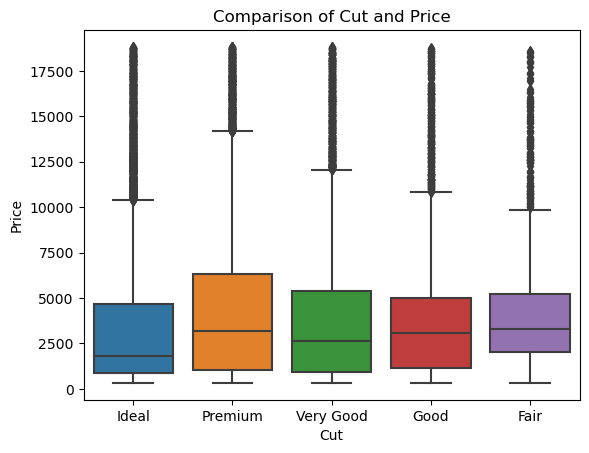

In [32]:
#9. Make boxplots to compare cut and price.

# Create a boxplot comparing cut and price
sns.boxplot(data=diamonds, x='cut', y='price')

# Set plot title and labels
plt.title('Comparison of Cut and Price')
plt.xlabel('Cut')
plt.ylabel('Price')

plt.show()

In [ ]:
#10. Why is it atypical to use a boxplot to compare carat to price? 
#Why might one want to do that anyway?

#It is atypical to use boxplots to compare carat to price because boxplots
#are usually ised to compare continuous numberical variables across
#different categories or groups. Carat and Price are both continuous
#variables which may not exactly have meaningful insights. You can still use
#a boxplot to identify trends as you can see which cut has more outliers or
#the average price for each cut. Boxplots can also be used for different
#variables like price and carat to show the ranges for each carat which can
#show variance for diamonds that have similar carat weight. Boxplots in 
#can simplify more complex relationships and in the process show/create
#meaningful and insightful trends, patterns and, etc.